In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import copy
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import random

%matplotlib inline

In [2]:
def draw(model, X, y):

    h = .02

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

# Wykorzystanie wewnętrznego podobieństwa punktów

Weźmy zbiór blobs jak poprzednio.

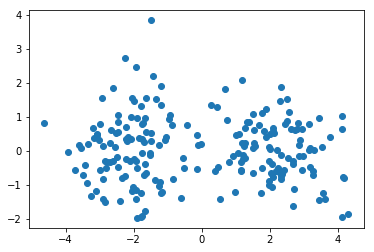

In [3]:


X, y = make_blobs(n_samples=210, centers = [[-2,0],[2,0]], random_state=42)
y_save = copy.deepcopy(y)
X_save = copy.deepcopy(X)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [4]:


num_labels = 10
num_unlabeled = len(y_save)-num_labels
random.seed(1)
inds_unlabeled = random.sample(range(len(y_save)), num_unlabeled)
y[inds_unlabeled] = -1


In [5]:
X_train = X_save[y>-1]
X_test = X_save[y == -1]
y_train = y_save[y > -1]
y_test = y_save[y == -1]

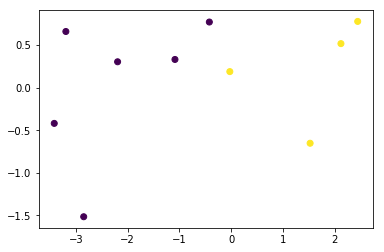

In [6]:
plt.scatter(X[y>=0][:,0], X[y>=0][:,1], c = y[y>=0])
plt.show()

Użyjmy modelu LabelPropagation

In [7]:
from sklearn.semi_supervised.label_propagation import LabelPropagation

model = LabelPropagation()
model.fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:288: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


LabelPropagation(alpha=None, gamma=20, kernel='rbf', max_iter=1000, n_jobs=1,
         n_neighbors=7, tol=0.001)

Możemy popatrzeć na rozkład przewidywania etykiet

In [8]:
model.label_distributions_ 

array([[  6.02760868e-04,   9.99397239e-01],
       [  7.81746315e-03,   9.92182537e-01],
       [  9.99314292e-01,   6.85707600e-04],
       [  9.99434566e-01,   5.65433703e-04],
       [  9.97799826e-01,   2.20017439e-03],
       [  9.83614080e-01,   1.63859198e-02],
       [  2.23887823e-07,   9.99999776e-01],
       [  9.99694597e-01,   3.05402780e-04],
       [  2.00531733e-04,   9.99799468e-01],
       [  8.87977541e-04,   9.99112022e-01],
       [  4.26640647e-02,   9.57335935e-01],
       [  9.98991436e-01,   1.00856392e-03],
       [  7.17280954e-03,   9.92827190e-01],
       [  1.85140361e-04,   9.99814860e-01],
       [  0.00000000e+00,   1.00000000e+00],
       [  7.17618346e-04,   9.99282382e-01],
       [  3.45441577e-03,   9.96545584e-01],
       [  9.50120232e-04,   9.99049880e-01],
       [  4.12684015e-03,   9.95873160e-01],
       [  9.99668361e-01,   3.31639024e-04],
       [  8.87500114e-03,   9.91124999e-01],
       [  4.15354569e-03,   9.95846454e-01],
       [  

Przewidywane labelki

In [9]:
model.transduction_  

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1])

Zobaczmy wynik

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.transduction_  
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_save, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.980952380952
1.0
0.98


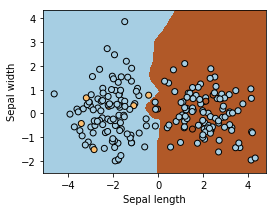

In [11]:
draw(model, X, y)

ZADANIE: Weźmy trudniejszy zbiór. Proszę wypróbować LP

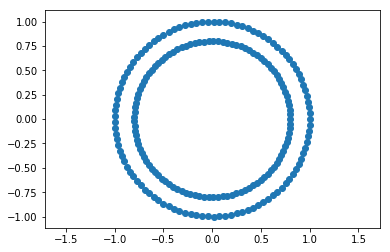

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=210, shuffle=False)
y_save = copy.deepcopy(y)
X_save = copy.deepcopy(X)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
import random

num_labels = 10
num_unlabeled = len(y_save)-num_labels
random.seed(1)
inds_unlabeled = random.sample(range(len(y_save)), num_unlabeled)
y[inds_unlabeled] = -1


In [14]:

from sklearn.semi_supervised import label_propagation

model = label_propagation.LabelPropagation()
model.fit(X, y)

LabelPropagation(alpha=None, gamma=20, kernel='rbf', max_iter=1000, n_jobs=1,
         n_neighbors=7, tol=0.001)

In [15]:


y_pred = model.transduction_
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_save, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.52380952381
0.4
0.425


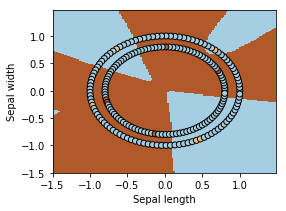

In [16]:
draw(model, X, y)

ZADANIE: Proszę wziąć kernel knn

C:\Users\user\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:277: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
C:\Users\user\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:288: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


0.52380952381
0.6
0.495


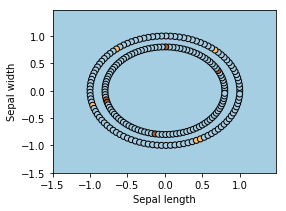

In [17]:

from sklearn.semi_supervised import label_propagation

model = label_propagation.LabelPropagation(kernel='knn')
model.fit(X, y)

from sklearn.metrics import accuracy_score

y_pred = model.transduction_
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_save, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

draw(model, X, y)

Sprawdźmy inny model - LabelSpreading

C:\Users\user\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


0.971428571429
0.48


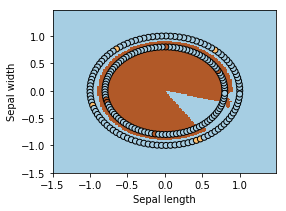

In [18]:

from sklearn.semi_supervised import label_propagation

model = label_propagation.LabelSpreading(kernel='knn')
model.fit(X, y)

from sklearn.metrics import accuracy_score

y_pred = model.transduction_
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_save, y_pred))
print(accuracy_score(y_test, y_test_pred))

draw(model, X, y)

# Label propagation:

Dane:

* $Y$ - macierz etykiet (znanych)
* $F$ - macierz przejścia (podobieństw)

Algorytm:

* $Y = FY$ - propaguj etykiety (potem normalizacja do prawdopodobieństw)
* Ustaw prawdziwe wartosci etykiet na $Y$
* Powtarzaj aż do zbieżności

Algorytm zbiega do globalnego rozwiązania

# Label spreading:

Dane:

* $Y$ - macierz etykiet (znanych)
* $F$ - macierz przejścia (podobieństw)

Algorytm:

* $S = D^{-1/2} F D^{-1/2}$ - normalizuj przejścia, tak żeby osłabić wagę wierzchołków o dużym stopniu
* $S = \alpha S + (1-\alpha) Y$
* Powtarzaj aż do zbieżności

Algorytm zbiega do globalnego rozwiązania


Różnice w porównaniu do poprzedniego:

* może zmieniać część prawdziwych etykiet (do poziomu $\alpha$), jeśli tylko wskazuje na to struktura danych
* normalizacja stopniem (sumaryczną wagą) wierzchołka

Label spreading jest następcą poprzedniego przez co jest trochę lepsze

# Metody grafowe

Metody grafowe to metody transdukcyjne tzn. nie pozwalają na łatwe przyporządkowanie nowych przykładów poza tymi na których były uczone.

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:500]]
y = digits.target[indices[:500]]
images = digits.images[indices[:500]]

In [4]:


y_save = copy.deepcopy(y)
X_save = copy.deepcopy(X)

num_labels = 30
num_unlabeled = len(y_save)-num_labels
print(num_unlabeled)
print(num_labels)
random.seed(1)
inds_unlabeled = random.sample(range(len(y_save)), num_unlabeled)
y[inds_unlabeled] = -1
len(set(y_save[y > -1]))

470
30


10

In [8]:
from sklearn.semi_supervised.label_propagation import LabelPropagation
from sklearn.semi_supervised.label_propagation import LabelSpreading

model = LabelSpreading(kernel='knn')
model.fit(X, y)


y_pred = model.transduction_
print(accuracy_score(y_save, y_pred))



C:\Users\marek\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


NameError: name 'accuracy_score' is not defined